In [ ]:
#Jenna Honeywell
#MSDS 422
#Assignment 1: Exploring and Visualizing Data 

In [ ]:
#COVID-19 is an ongoing threat.  Data for the outbreak are available here:  https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide (Links to an external site.)
#Using this data, you are to conduct exploratory data analysis.  Provide appropriate descriptive statistics/visualizations
#to help understand the spread of the disease (incidence) as well as its fatality rate.  You should also engage in feature
#creation and variable transformation.  At a bare minimum, feature creation should include generating rates per X in the
#population (i.e., rates per million).  Investigate time series as well as univariate and bivariate distribution graphs. 

#Select one of variable and perform both min-max and standard scaling in Python.

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython
from IPython.display import display
import sys
import sklearn
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

In [85]:
corona_df = pd.read_csv("corona.csv")

In [86]:
#Take a look at data types to see what the data looks like and to see the column names
corona_df.dtypes

dateRep                     object
day                          int64
month                        int64
year                         int64
cases                        int64
deaths                       int64
countriesAndTerritories     object
geoId                       object
countryterritoryCode        object
popData2018                float64
dtype: object

In [87]:
corona_df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,4/10/2020,10,4,2020,61,1,Afghanistan,AF,AFG,37172386.0
1,4/9/2020,9,4,2020,56,3,Afghanistan,AF,AFG,37172386.0
2,4/8/2020,8,4,2020,30,4,Afghanistan,AF,AFG,37172386.0
3,4/7/2020,7,4,2020,38,0,Afghanistan,AF,AFG,37172386.0
4,4/6/2020,6,4,2020,29,2,Afghanistan,AF,AFG,37172386.0


In [88]:
corona_df.count()

dateRep                    9922
day                        9922
month                      9922
year                       9922
cases                      9922
deaths                     9922
countriesAndTerritories    9922
geoId                      9895
countryterritoryCode       9725
popData2018                9769
dtype: int64

In [92]:
#There appear to be some missing values in the geoId, countryTerritoryCode, and popDate2018 columns.  Give the sizeable 
#dataset and the fact that most countries are represented and have complete data, I have chosen to create a new dataframe
#with dropped NaN rows. 
clean_corona=corona_df.dropna()
clean_corona.count()

dateRep                    9678
day                        9678
month                      9678
year                       9678
cases                      9678
deaths                     9678
countriesAndTerritories    9678
geoId                      9678
countryterritoryCode       9678
popData2018                9678
dtype: int64

In [94]:
clean_corona.drop_duplicates(keep=False)
clean_corona.count()
#I attempted to drop any duplicate rows as they are redundant and would potentially skew results.  Since the counts are the
#same before and after dropping duplicates, there appear to be no duplicate rows. 

dateRep                    9678
day                        9678
month                      9678
year                       9678
cases                      9678
deaths                     9678
countriesAndTerritories    9678
geoId                      9678
countryterritoryCode       9678
popData2018                9678
dtype: int64

In [97]:
#Checking columns to make sure data falls within appropriate ranges: 
#The day column is checked to make sure all days fall within 1-31
#The month column is checked to make sure all months fall within 1-12
#The year column is checked to make sure only relevant years (2019 and 2020) are included
#The cases column is checked to make sure that all values are at least 0 since cases per day can't be negative
#The deaths column is checked to make sure that all values are at least 0 since deaths per day can't be negative
clean_corona[(clean_corona.day >= 1) & (clean_corona.day <= 31) & (clean_corona.month >= 1) & (clean_corona.month <= 12) & (clean_corona.year >= 2019) & (clean_corona.year <= 2020) & (clean_corona.cases >= 0) & (clean_corona.deaths >= 0)]
#The output below still has 9678 rows so all data checked falls within appropriate ranges

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,4/10/2020,10,4,2020,61,1,Afghanistan,AF,AFG,37172386.0
1,4/9/2020,9,4,2020,56,3,Afghanistan,AF,AFG,37172386.0
2,4/8/2020,8,4,2020,30,4,Afghanistan,AF,AFG,37172386.0
3,4/7/2020,7,4,2020,38,0,Afghanistan,AF,AFG,37172386.0
4,4/6/2020,6,4,2020,29,2,Afghanistan,AF,AFG,37172386.0
5,4/5/2020,5,4,2020,35,1,Afghanistan,AF,AFG,37172386.0
6,4/4/2020,4,4,2020,0,0,Afghanistan,AF,AFG,37172386.0
7,4/3/2020,3,4,2020,43,0,Afghanistan,AF,AFG,37172386.0
8,4/2/2020,2,4,2020,26,0,Afghanistan,AF,AFG,37172386.0
9,4/1/2020,1,4,2020,25,0,Afghanistan,AF,AFG,37172386.0


In [99]:
#Adding some additional columns to the dataframe using collected data.  

#ADDING POP IN MILLIONS TO DF
clean_corona['pop_in_millions'] = (clean_corona['popData2018']/1000000)

#ADDING CASES PER MILLION PEOPLE
clean_corona['cases_per_mil'] = ((clean_corona['cases'])/(clean_corona['pop_in_millions']))


#ADDING DEATHS PER MILLION PEOPLE
clean_corona['deaths_per_mil'] = ((clean_corona['deaths'])/(clean_corona['pop_in_millions']))

clean_corona.head()

C:\Users\jrh597\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\jrh597\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\jrh597\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,pop_in_millions,cases_per_mil,deaths_per_mil
0,4/10/2020,10,4,2020,61,1,Afghanistan,AF,AFG,37172386.0,37.172386,1.641003,0.026902
1,4/9/2020,9,4,2020,56,3,Afghanistan,AF,AFG,37172386.0,37.172386,1.506495,0.080705
2,4/8/2020,8,4,2020,30,4,Afghanistan,AF,AFG,37172386.0,37.172386,0.807051,0.107607
3,4/7/2020,7,4,2020,38,0,Afghanistan,AF,AFG,37172386.0,37.172386,1.022264,0.000000
4,4/6/2020,6,4,2020,29,2,Afghanistan,AF,AFG,37172386.0,37.172386,0.780149,0.053803


In [103]:
#Looking at summary statistics for the dataset
clean_corona.describe()

,day,month,year,cases,deaths,popData2018,pop_in_millions,cases_per_mil,deaths_per_mil
count,9678.000000,9678.000000,9678.000000,9678.000000,9678.000000,9.678000e+03,9678.000000,9678.000000,9678.000000
mean,15.317731,2.652201,2019.993284,160.935421,9.808328,6.381103e+07,63.811028,10.895299,0.435150
std,9.306255,1.285981,0.081681,1241.375471,79.806907,2.003893e+08,200.389324,63.465818,3.722526
min,1.000000,1.000000,2019.000000,0.000000,0.000000,1.000000e+03,0.001000,0.000000,0.000000
25%,7.000000,2.000000,2020.000000,0.000000,0.000000,3.545883e+06,3.545883,0.000000,0.000000
50%,15.000000,3.000000,2020.000000,0.000000,0.000000,1.062716e+07,10.627165,0.000000,0.000000
75%,24.000000,3.000000,2020.000000,15.000000,0.000000,4.222843e+07,42.228429,2.019356,0.000000
max,31.000000,12.000000,2020.000000,34272.000000,2004.000000,1.392730e+09,1392.730000,4000.000000,177.593607


In [100]:
#Looking at total cases per country as of 4/10/2020
clean_corona.groupby(clean_corona.countriesAndTerritories)['cases'].sum()

countriesAndTerritories
Afghanistan                        484
Albania                            409
Algeria                           1666
Andorra                            583
Angola                              19
Antigua_and_Barbuda                 19
Argentina                         1894
Armenia                            921
Aruba                               82
Australia                         6152
Austria                          13248
Azerbaijan                         926
Bahamas                             41
Bahrain                            887
Bangladesh                         330
Barbados                            66
Belarus                           1486
Belgium                          24983
Belize                               9
Benin                               30
Bermuda                             48
Bhutan                               5
Bolivia                            268
Bosnia_and_Herzegovina             875
Botswana                            13
B

In [101]:
#Looking at total deaths per country as of 4/10/2020
clean_corona.groupby(clean_corona.countriesAndTerritories)['deaths'].sum()

countriesAndTerritories
Afghanistan                        15
Albania                            23
Algeria                           235
Andorra                            25
Angola                              2
Antigua_and_Barbuda                 2
Argentina                          79
Armenia                            10
Aruba                               0
Australia                          52
Austria                           295
Azerbaijan                          9
Bahamas                             8
Bahrain                             5
Bangladesh                         21
Barbados                            3
Belarus                            16
Belgium                          2523
Belize                              1
Benin                               1
Bermuda                             4
Bhutan                              0
Bolivia                            19
Bosnia_and_Herzegovina             36
Botswana                            1
Brazil                    

In [102]:
#Looking at the percentage of cases that result in death per country 
100*((clean_corona.groupby(clean_corona.countriesAndTerritories)['deaths'].sum())/(clean_corona.groupby(clean_corona.countriesAndTerritories)['cases'].sum()))

countriesAndTerritories
Afghanistan                      3.099174
Albania                          5.623472
Algeria                         14.105642
Andorra                          4.288165
Angola                          10.526316
Antigua_and_Barbuda             10.526316
Argentina                        4.171067
Armenia                          1.085776
Aruba                            0.000000
Australia                        0.845254
Austria                          2.226751
Azerbaijan                       0.971922
Bahamas                         19.512195
Bahrain                          0.563698
Bangladesh                       6.363636
Barbados                         4.545455
Belarus                          1.076716
Belgium                         10.098867
Belize                          11.111111
Benin                            3.333333
Bermuda                          8.333333
Bhutan                           0.000000
Bolivia                          7.089552
Bosnia_and

In [104]:
#Creating a dataframe of just US data to focus analysis on one country
USA = clean_corona.loc[corona_df['geoId'] == 'US']

In [106]:
#Looking at summary statistics for US data
USA.describe()

,day,month,year,cases,deaths,popData2018,pop_in_millions,cases_per_mil,deaths_per_mil
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.0,1.020000e+02,102.000000,102.000000
mean,14.833333,2.294118,2019.990196,4568.950980,163.627451,327167434.0,3.271674e+02,13.965177,0.500134
std,9.059849,1.382982,0.099015,9690.532242,424.376582,0.0,2.284965e-13,29.619489,1.297124
min,1.000000,1.000000,2019.000000,0.000000,0.000000,327167434.0,3.271674e+02,0.000000,0.000000
25%,7.000000,1.000000,2020.000000,0.000000,0.000000,327167434.0,3.271674e+02,0.000000,0.000000
50%,14.000000,2.000000,2020.000000,1.000000,0.000000,327167434.0,3.271674e+02,0.003057,0.000000
75%,22.750000,3.000000,2020.000000,811.500000,10.000000,327167434.0,3.271674e+02,2.480381,0.030565
max,31.000000,12.000000,2020.000000,34272.000000,1922.000000,327167434.0,3.271674e+02,104.753702,5.874668


In [113]:
#Creating an index with the date data
USA = USA.set_index('dateRep')
USA.index

Index(['4/10/2020', '4/9/2020', '4/8/2020', '4/7/2020', '4/6/2020', '4/5/2020',
       '4/4/2020', '4/3/2020', '4/2/2020', '4/1/2020',
       ...
       '1/9/2020', '1/8/2020', '1/7/2020', '1/6/2020', '1/5/2020', '1/4/2020',
       '1/3/2020', '1/2/2020', '1/1/2020', '12/31/2019'],
      dtype='object', name='dateRep', length=102)

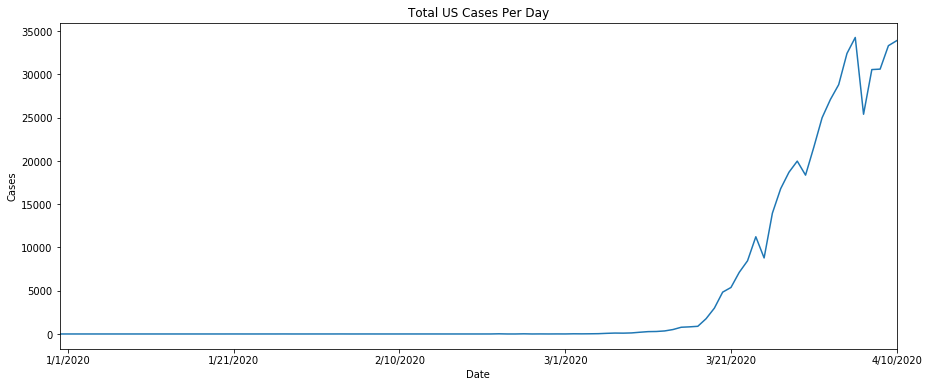

In [117]:
#GRAPH OF TOTAL US CASES PER DAY
y = USA['cases']
y.plot(figsize=(15, 6))
plt.gca().invert_xaxis()
plt.title('Total US Cases Per Day')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.show()

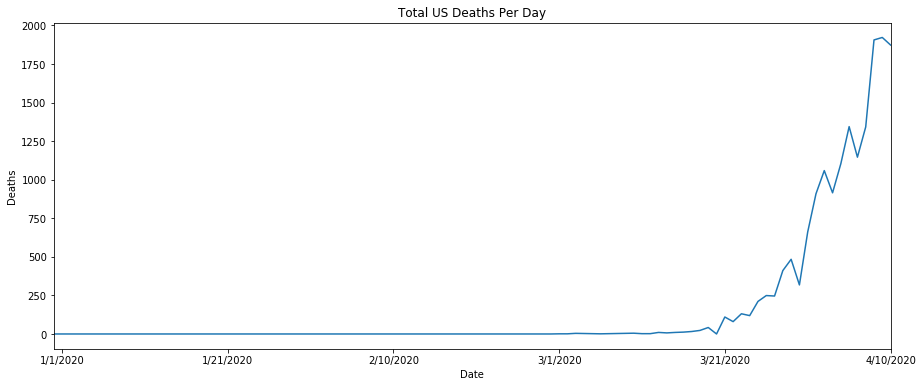

In [118]:
#GRAPH OF TOTAL US DEATHS PER DAY
z = USA['deaths']
z.plot(figsize=(15,6))
plt.gca().invert_xaxis()
plt.title('Total US Deaths Per Day')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.show()

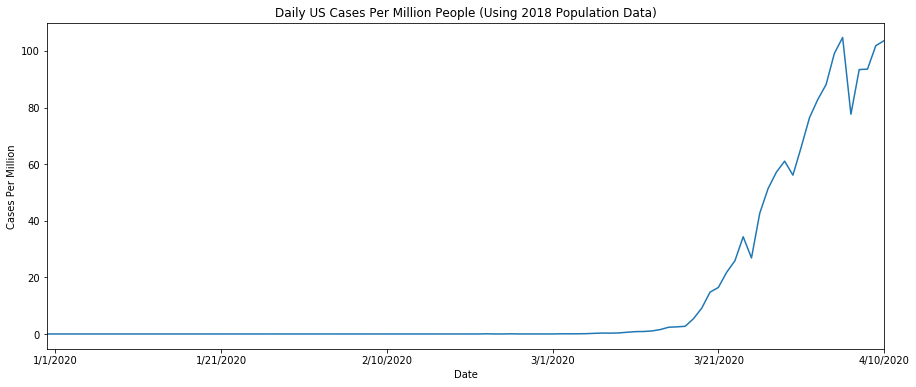

In [119]:
#GRAPH OF CASES PER MILLION PEOPLE PER DAY
a = USA['cases_per_mil']
a.plot(figsize=(15,6))
plt.gca().invert_xaxis()
plt.title('Daily US Cases Per Million People (Using 2018 Population Data)')
plt.xlabel('Date')
plt.ylabel('Cases Per Million')
plt.show()

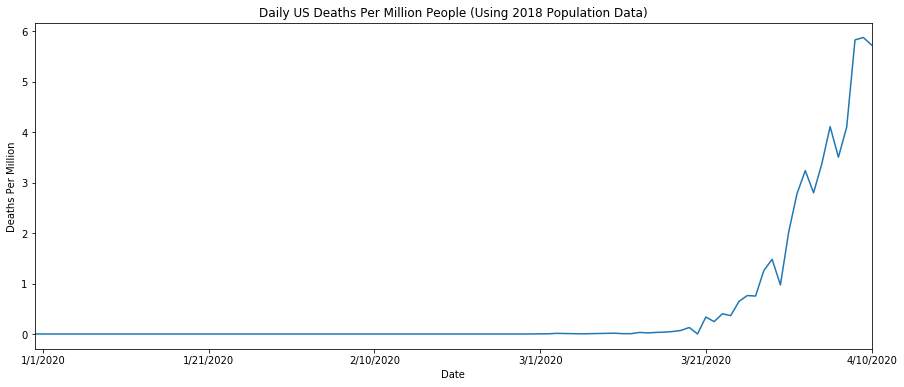

In [120]:
#GRAPH OF DEATHS PER MILLION PEOPLE PER DAY
b = USA['deaths_per_mil']
b.plot(figsize=(15,6))
plt.gca().invert_xaxis()
plt.title('Daily US Deaths Per Million People (Using 2018 Population Data)')
plt.xlabel('Date')
plt.ylabel('Deaths Per Million')
plt.show()

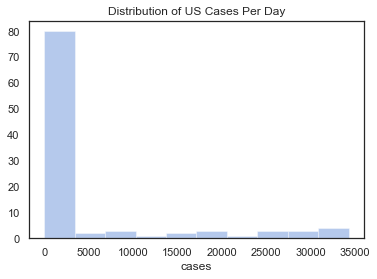

In [144]:
#Univariate distribution of US cases per day
USA_cases=USA['cases']
sns.distplot(USA_cases, bins=10, kde=False).set_title("Distribution of US Cases Per Day")
plt.show()

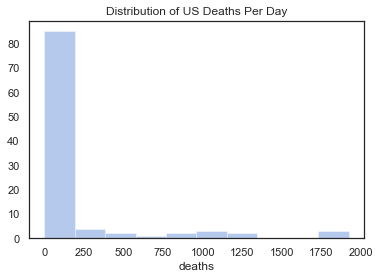

In [145]:
#Univariate distribution of US deaths per day
USA_deaths=USA['deaths']
sns.distplot(USA_deaths, bins=10,kde=False).set_title("Distribution of US Deaths Per Day")
plt.show()

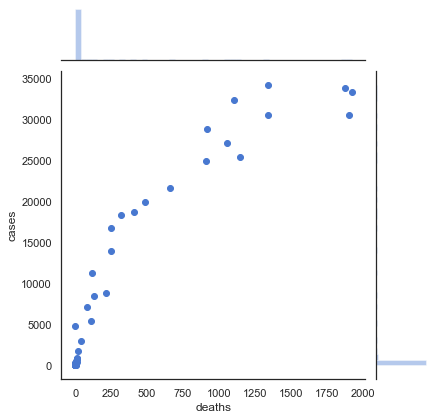

In [169]:
#Bivariate distribution of cases v. deaths
sns.jointplot(data=USA,x='deaths', y='cases')

In [173]:
scale_cases = pd.DataFrame(USA['cases'])
scale_cases.describe()

,cases
count,102.000000
mean,4568.950980
std,9690.532242
min,0.000000
25%,0.000000
50%,1.000000
75%,811.500000
max,34272.000000


C:\Users\jrh597\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  
C:\Users\jrh597\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  from ipykernel import kernelapp as app
C:\Users\jrh597\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


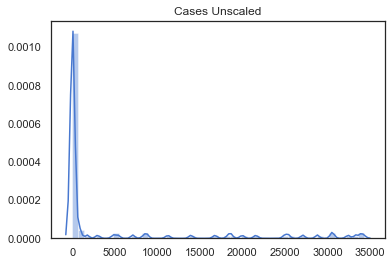

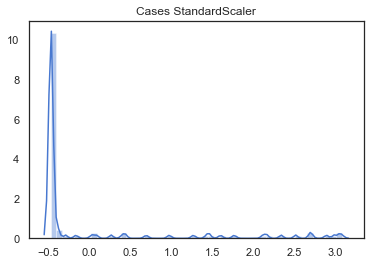

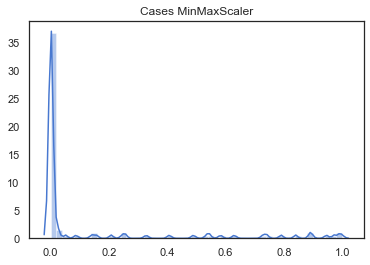

In [174]:
#Attempting to use minmax and standard scalers on US case data 

sc = scale_cases

unscaled_fig, ax = plt.subplots()
sns.distplot(sc).set_title('Cases Unscaled')
unscaled_fig.savefig('Transformation-Unscaled' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

standard_fig, ax = plt.subplots()
sns.distplot(StandardScaler().fit_transform(np.array(sc).reshape(-1,1))).set_title('Cases StandardScaler')
standard_fig.savefig('Transformation-StandardScaler' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

minmax_fig, ax = plt.subplots()
sns.distplot(MinMaxScaler().fit_transform(np.array(sc).reshape(-1,1))).set_title('Cases MinMaxScaler')
minmax_fig.savefig('Transformation-MinMaxScaler' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None) 

In [177]:
scale_deaths = pd.DataFrame(USA['deaths'])
scale_deaths.describe()

,deaths
count,102.000000
mean,163.627451
std,424.376582
min,0.000000
25%,0.000000
50%,0.000000
75%,10.000000
max,1922.000000


C:\Users\jrh597\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  
C:\Users\jrh597\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  from ipykernel import kernelapp as app
C:\Users\jrh597\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


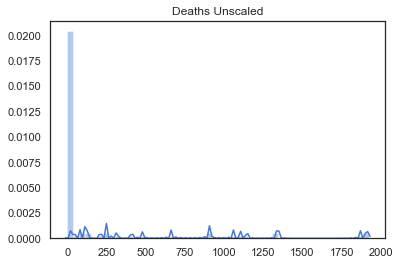

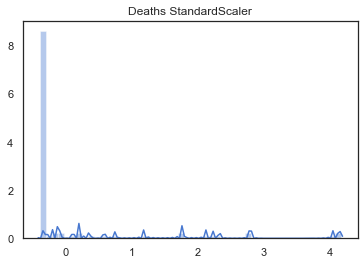

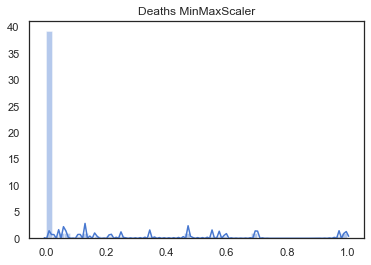

In [178]:
#Attempting to use minmax and standard scalers on US death data 

sd = scale_deaths

unscaled_fig, ax = plt.subplots()
sns.distplot(sd).set_title('Deaths Unscaled')
unscaled_fig.savefig('Transformation-Unscaled' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

standard_fig, ax = plt.subplots()
sns.distplot(StandardScaler().fit_transform(np.array(sd).reshape(-1,1))).set_title('Deaths StandardScaler')
standard_fig.savefig('Transformation-StandardScaler' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

minmax_fig, ax = plt.subplots()
sns.distplot(MinMaxScaler().fit_transform(np.array(sd).reshape(-1,1))).set_title('Deaths MinMaxScaler')
minmax_fig.savefig('Transformation-MinMaxScaler' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None) 